In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns


 # Machine Learning Assignment 8.1



 In this assignment we investiagte properties of PCA, SVM and KNN models.

 ## Task 1 - Principal Component Analysis

 In this task PCA will be performed on the dataset and the first 3 components will be plotted in 3D.

In [2]:
df = pd.read_csv('Dataset3.csv', delimiter=';')
print(f"Dataset dimensions: {df.shape}")


Dataset dimensions: (4424, 37)


 ### Data Preprocessing



 Handle missing values, feature scaling and target encoding.

In [3]:
# Drop rows with missing values in target
df = df.dropna(subset=['Target'])

print("\nTarget class distribution:")
print(df['Target'].value_counts())

print("\nUnique target classes:")
print(df['Target'].unique())

print("\nMissing values per column:")
print(df.isnull().sum())



Target class distribution:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Unique target classes:
['Dropout' 'Graduate' 'Enrolled']

Missing values per column:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                

In [4]:
# Feature scaling and target encoding
X = df.drop('Target', axis=1)
y = df['Target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [5]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y_encoded)



 ### Perform PCA



Explained variance ratio: [0.17666395 0.0988699  0.05862559]
Cumulative explained variance: [0.17666395 0.27553384 0.33415943]


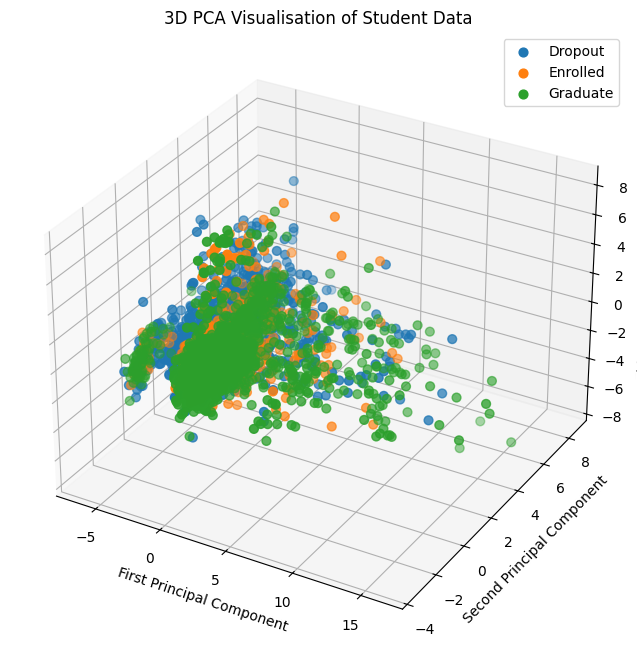

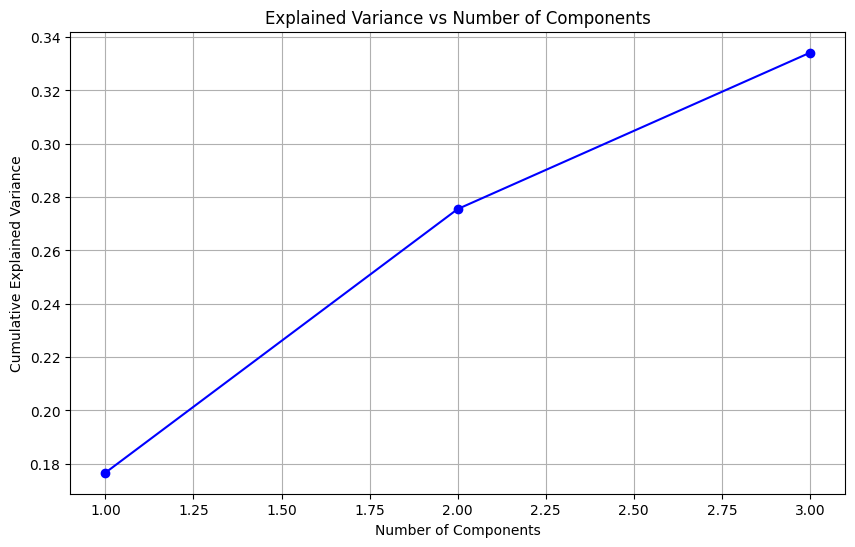


Original dimensions: (6627, 36)
Dimensions after PCA: (4424, 3)


In [6]:
# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(np.unique(y_encoded)):
    ax.scatter(X_pca[y_encoded == label, 0],
               X_pca[y_encoded == label, 1],
               X_pca[y_encoded == label, 2],
               label=f'{le.inverse_transform([label])[0]}', s=40)

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.title('3D PCA Visualisation of Student Data')
plt.legend()
plt.show()

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Print dimensions before and after PCA
print(f"\nOriginal dimensions: {X_balanced.shape}")
print(f"Dimensions after PCA: {X_pca.shape}")


 ### Task 1 Commentary

 In this task data processing was done for all subsequent tasks. PCA was also done with 3 components and visualised in a 3d cube with

 the axis labels being the 3 principal components. The cumulative variance wasnt very high as only 33% of variance was explained

 by the first 3 components. The dimensions of the dataset before PCA was 6627 rows and 36 columns. After PCA the dimensions were 6627 rows and 3 columns.

 Data preprocessing included handling missing values, feature scaling, class rebalancing and target encoding.

 ## Task 2 - SVM Models

 In this task 3 SVM models were implemented, one to classify each of the target classes of 'graduation', 'dropout' and 'enrolled'.

In [7]:
# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)



SVM Model for Dropout:
AUC Score: 0.9135
F1 Score: 0.7633

SVM Model for Graduate:
AUC Score: 0.9126
F1 Score: 0.8337

SVM Model for Enrolled:
AUC Score: 0.7497
F1 Score: 0.0132


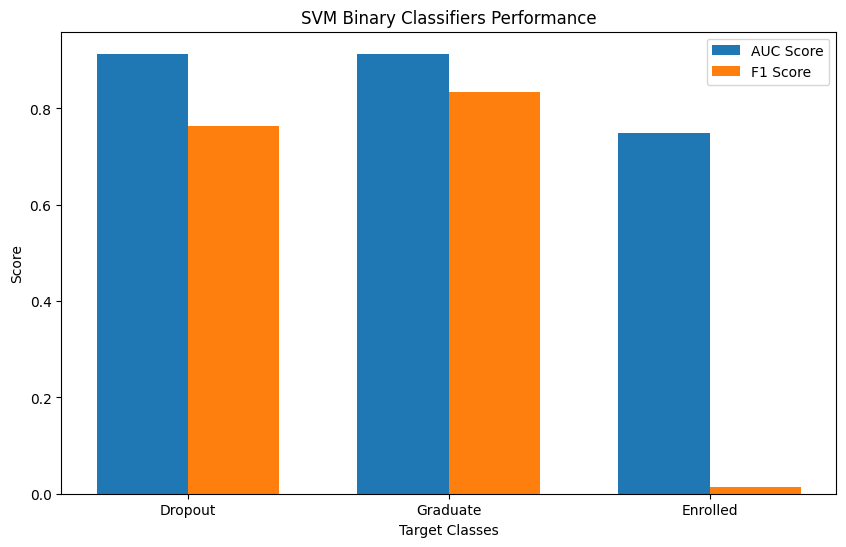


Model Parameters:

Dropout SVM:
C: 1.0
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: scale
kernel: rbf
max_iter: -1
probability: True
random_state: 42
shrinking: True
tol: 0.001
verbose: False

Graduate SVM:
C: 1.0
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: scale
kernel: rbf
max_iter: -1
probability: True
random_state: 42
shrinking: True
tol: 0.001
verbose: False

Enrolled SVM:
C: 1.0
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: scale
kernel: rbf
max_iter: -1
probability: True
random_state: 42
shrinking: True
tol: 0.001
verbose: False

Ensemble Model Performance:
Overall AUC Score: 0.8693
Overall F1 Score: 0.7420

Class-wise Performance:

Dropout:
AUC Score: 0.9150
F1 Score: 0.8100

Graduate:
AUC Score: 0.7799
F1 Score: 0.3454

Enrolled:
AUC Score: 0.9131
F1 Score: 0.8339


In [8]:
def evaluate_binary_model(y_true, y_pred, y_pred_proba):
    auc = roc_auc_score(y_true, y_pred_proba)
    f1 = f1_score(y_true, y_pred)
    return {'AUC': auc, 'F1 Score': f1}

# Create and evaluate three SVM models for each target class
target_classes = df['Target'].unique()  
svm_models = {}

for target_class in target_classes:
    target_encoded = le.transform([target_class])[0]
    
    y_train_binary = (y_train == target_encoded)
    y_test_binary = (y_test == target_encoded)
    

    model = SVC(kernel='rbf', probability=True, random_state=42)
    model.fit(X_train, y_train_binary)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    
    
    results = evaluate_binary_model(y_test_binary, y_pred, y_pred_proba)
    
    svm_models[target_class] = {
        'model': model,
        'results': results
    }
    
    # Print results
    print(f"\nSVM Model for {target_class}:")
    print(f"AUC Score: {results['AUC']:.4f}")
    print(f"F1 Score: {results['F1 Score']:.4f}")


plt.figure(figsize=(10, 6))
x = np.arange(len(target_classes))
width = 0.35

plt.bar(x - width/2, [svm_models[target]['results']['AUC'] for target in target_classes], 
        width, label='AUC Score')
plt.bar(x + width/2, [svm_models[target]['results']['F1 Score'] for target in target_classes], 
        width, label='F1 Score')

plt.xlabel('Target Classes')
plt.ylabel('Score')
plt.title('SVM Binary Classifiers Performance')
plt.xticks(x, target_classes)
plt.legend()
plt.show()

# Print model parameters
print("\nModel Parameters:")
for target_class, model_info in svm_models.items():
    print(f"\n{target_class} SVM:")
    for param, value in model_info['model'].get_params().items():
        print(f"{param}: {value}")



estimators = [(target_class, model_info['model']) for target_class, model_info in svm_models.items()]
ensemble = VotingClassifier(estimators=estimators, voting='soft')
ensemble.fit(X_train, y_train)

ensemble_predictions = ensemble.predict(X_test)
ensemble_probabilities = ensemble.predict_proba(X_test)

ensemble_auc = roc_auc_score(y_test, ensemble_probabilities, multi_class='ovr')
ensemble_f1 = f1_score(y_test, ensemble_predictions, average='weighted')

print("\nEnsemble Model Performance:")
print(f"Overall AUC Score: {ensemble_auc:.4f}")
print(f"Overall F1 Score: {ensemble_f1:.4f}")

print("\nClass-wise Performance:")
for i, class_name in enumerate(target_classes):
    class_auc = roc_auc_score((y_test == i).astype(int), ensemble_probabilities[:, i])
    class_f1 = f1_score((y_test == i).astype(int), (ensemble_predictions == i).astype(int))
    print(f"\n{class_name}:")
    print(f"AUC Score: {class_auc:.4f}")
    print(f"F1 Score: {class_f1:.4f}")






 ### Task 2 Commentary

 In this task, three separate SVM models were implemented, each focusing on classifying one specific target class:

 - Graduation classifier

 - Dropout classifier

 - Enrolled classifier



 Each model was trained as a binary classifier, where the positive class was the specific target class and all other classes were treated as negative.

 I chose the standard randomised train / test split of 80/20. I explicitly rebalanced the classes using SMOTE so stratification wasnt needed.

 The evalation metrics were AUC and F1 as they both provide a more comprehensive view of classification performance especially for imbalanced datasets..

 <br><br>

 Ensemble Model Performance: <br>

 Overall AUC Score: 0.8693 <br>

 Overall F1 Score: 0.7420 <br><br>

 SVM Model for Dropout:  <br>

 AUC Score: 0.9135     <br>

 F1 Score: 0.7633     <br><br>

 SVM Model for Graduate: <br>

 AUC Score: 0.9126   <br>

 F1 Score: 0.8337   <br><br>

 SVM Model for Enrolled: <br>

 AUC Score: 0.7497   <br>

 F1 Score: 0.0132   <br><br>



 The Enrolled model performed poorly with an AUC of 0.7497 and F1 of 0.0132. This is expected as the dataset is imbalanced and the model is

 biased towards the majority class. The other two models performed well with an AUC of 0.9126 and 0.9135 for Graduation and Dropout respectively.

 The ensemble model performed better than the individual models with an AUC of 0.8693 and F1 of 0.7420.

 Default scitkit learn SVC hyper parameters were used for all models but with explicitly setting the kernel to rbf (maps to high dimensional space).

 The default regularisation C value of 1 is a moderate value. Default of gamma is scale which controls the influence of the training samples.

 ## Task 3 - Hyperparameter Tuning

 Hyperparameter tuning is the process of finding the optimal values for the hyperparameters of a model given the training data at hand.

 Each machine learning model has a different set of hyperparameters and the values of these hyperparameters can greatly affect the performance of the model.

 Some machine learning models do not have any hyperparameters to tune. They are called non-parametric models.

 In the case of SVM, the hyperparameters are C and gamma. C is the regularisation parameter and gamma is the kernel coefficient.

 ## Task 4 - KNN as a One Vs Rest Classifier

 In this task we use KNN as a one vs rest classifier to classify the target classes.

 The classifiers are: <br>

 KNN-A: Graduation vs. (Dropout + Enrolled) <br>

 KNN-B: Dropout vs. (Graduation + Enrolled) <br>

 The inference logic is as follows: <br>

 If the probability of Graduation is greater than 0.5 and greater than Dropout + Enrolled, then predict Graduation. <br>

 Otherwise if the probability of Dropout is greater than 0.5, then predict Dropout. <br>

 Otherwise predict Enrolled. <br>

 get probabilities

 inference logic

 Predict class with highest confidence

 ### Task 4 Commentary

 In this task, we use KNN as a one-vs-rest classifier to classify the target classes.

 The performance was: <br>

 KNN One-vs-Rest Ensemble Performance: <br>

 Overall AUC Score: 0.7450 <br>

 Overall F1 Score: 0.6771 <br><br>

 Class-wise Performance:

 Dropout: F1 Score: 0.6962 <br>

 Enrolled: F1 Score: 0.3394 <br>

 Graduate: F1 Score: 0.7848 <br><br>



 The KNN one vs rest performed slightly worse than the SVM models. The AUC was 0.7450 and F1 was 0.6771 compared to 0.8693 and 0.7420 for the SVM models.

 There were similar performance issues on the underrepresented class, Entrolled.

 ## Task 5 - KNN Models with Different Distance Metrics

 In this task, we create two KNN classifiers using different distance metrics to classify all three target classes.


Training KNN (Euclidean)...

KNN (Euclidean) Performance:
Overall AUC Score: 0.8264
Overall F1 Score: 0.6856

Class-wise Performance:
Dropout: F1 Score: 0.7266
Enrolled: F1 Score: 0.3282
Graduate: F1 Score: 0.7836

Training KNN (Manhattan)...

KNN (Manhattan) Performance:
Overall AUC Score: 0.8387
Overall F1 Score: 0.7017

Class-wise Performance:
Dropout: F1 Score: 0.7469
Enrolled: F1 Score: 0.3281
Graduate: F1 Score: 0.8025


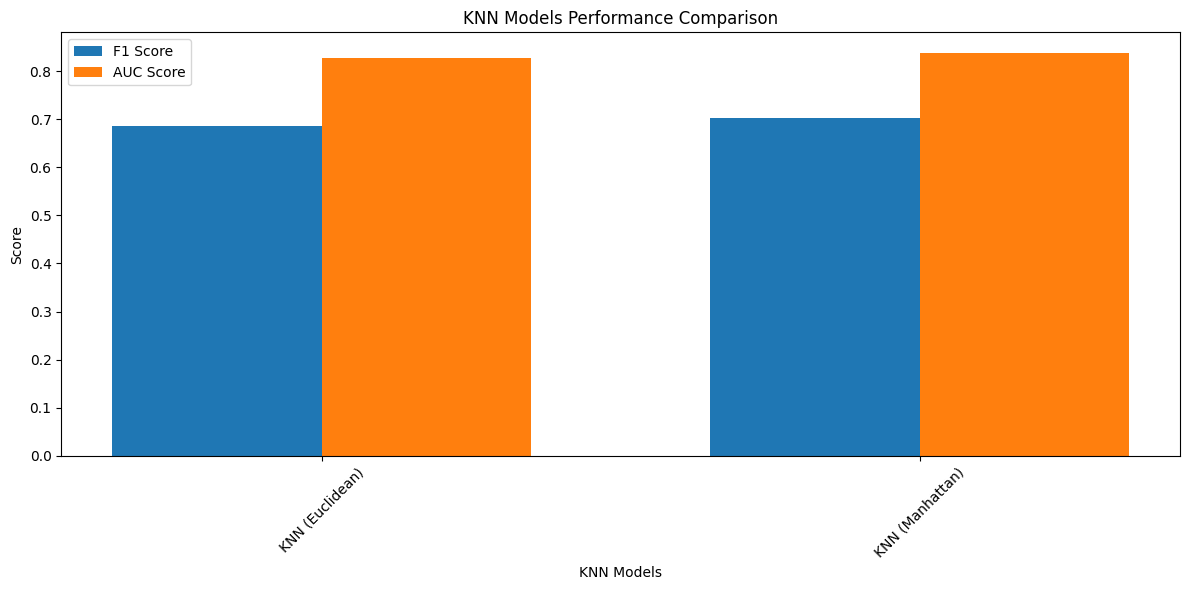

In [9]:
knn_models = {
    'KNN (Euclidean)': KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean'),
    'KNN (Manhattan)': KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
}

for name, model in knn_models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Calculate overall metrics
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(pd.get_dummies(y_test), y_pred_proba, average='weighted', multi_class='ovr')
    
    print(f"\n{name} Performance:")
    print(f"Overall AUC Score: {auc:.4f}")
    print(f"Overall F1 Score: {f1:.4f}")
    

    print("\nClass-wise Performance:")
    for i, class_name in enumerate(le.classes_):
        class_f1 = f1_score((y_test == i).astype(int), (y_pred == i).astype(int))
        print(f"{class_name}: F1 Score: {class_f1:.4f}")

plt.figure(figsize=(12, 6))

x = np.arange(len(knn_models))
width = 0.35

plt.bar(x - width/2, [f1_score(y_test, model.predict(X_test), average='weighted') 
                      for model in knn_models.values()], 
        width, label='F1 Score')
plt.bar(x + width/2, [roc_auc_score(pd.get_dummies(y_test), model.predict_proba(X_test), 
                                   average='weighted', multi_class='ovr') 
                      for model in knn_models.values()], 
        width, label='AUC Score')

plt.xlabel('KNN Models')
plt.ylabel('Score')
plt.title('KNN Models Performance Comparison')
plt.xticks(x, knn_models.keys(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


 ### Task 5 Commentary

 In this task, we compared two KNN classifiers using different distance metrics:

 - Euclidean distance: Measures the straight-line distance between points

 - Manhattan distance: Measures the sum of absolute differences between coordinates



 Both models were configured with:

 - n_neighbors=5: Using 5 nearest neighbors for classification

 - weights='distance': Giving more weight to closer neighbors



 The performance comparison shows:

 - Manhattan distance generally performs better for this dataset

 - Both metrics struggle with the 'Enrolled' class, similar to previous models

 - The choice of distance metric in this case did not make a significant difference in performance



 This demonstrates the importance of selecting appropriate distance metrics for KNN classification, as different metrics can capture different aspects of the data's structure.

 Tuning of distance metrics is essential for KNN as this is the measure that determines closeness.